In [1]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec
import matplotlib
from tqdm import tqdm
from numba import prange,njit
import math
import os
import pickle
plt.style.use(hep.style.CMS)
%matplotlib inline

In [2]:
@njit
def dist_numba(refEta, refPhi, otherTsEta, otherTsPhi):
    out = []
    for i in range(len(otherTsEta)):
        deltaphi=abs(otherTsPhi[i] - refPhi)
        if deltaphi>math.pi: deltaphi=deltaphi-2*math.pi
        distance = ((otherTsEta[i] - refEta) ** 2 + (deltaphi) ** 2) ** 0.5
        out.append(distance)
    return np.array(out)
@njit
def distWrap_numba(refEta, refPhi, otherTsEta, otherTsPhi):
    out = []
    for i in range(len(otherTsEta)):
        deltaPhi = otherTsPhi[i] - refPhi
        deltaPhi = (deltaPhi + np.pi) % (2 * np.pi) - np.pi
        distance = ((otherTsEta[i] - refEta) ** 2 + deltaPhi ** 2) ** 0.5
        out.append(distance)
    return np.array(out)

@njit
def flatten_numba(a):
    return [x[0] if len(x) else 0 for x in a]



In [3]:
#filename='/eos/cms/store/group/dpg_hgcal/comm_hgcal/wredjeb/TICLv5Performance/TimeResolutionPtError0PU/SinglePionTiming_1p9_100GeV/histo/histo_96692_0.root'
filename = "/eos/cms/store/group/dpg_hgcal/comm_hgcal/wredjeb/TICLv5Performance/TimeResolutionFinal200PU/SinglePionTimingPU_1p9_50GeV/histo/histo_81848_2.root"
path = "/eos/cms/store/group/dpg_hgcal/comm_hgcal/wredjeb/TICLv5Performance/TimeResolutionFinal200PU/SinglePionTimingPU_1p9_50GeV/histo/"
files = os.listdir(path)[:10]
print(files)
file = uproot.open(filename)

['histo_81848_0.root', 'histo_81848_1.root', 'histo_81848_10.root', 'histo_81848_11.root', 'histo_81848_12.root', 'histo_81848_13.root', 'histo_81848_14.root', 'histo_81848_15.root', 'histo_81848_16.root', 'histo_81848_17.root']


In [4]:
file.keys()

['ticlDumper;1',
 'ticlDumper/simtrackstersSC;11',
 'ticlDumper/simtrackstersSC;10',
 'ticlDumper/associations;11',
 'ticlDumper/associations;10',
 'ticlDumper/simtrackstersCP;9',
 'ticlDumper/simtrackstersCP;8',
 'ticlDumper/simtracksters2HitsSC;9',
 'ticlDumper/simtracksters2HitsSC;8',
 'ticlDumper/simtracksters2HitsCP;8',
 'ticlDumper/simtracksters2HitsCP;7',
 'ticlDumper/trackstersCLUE3DHigh;2',
 'ticlDumper/trackstersCLUE3DHigh;1',
 'ticlDumper/trackstersTiclCandidate;2',
 'ticlDumper/trackstersTiclCandidate;1',
 'ticlDumper/trackstersSuperclusteringDNN;1',
 'ticlDumper/candidates;1',
 'ticlDumper/tracks;1',
 'ticlDumper/simTICLCandidate;1']

In [5]:
file["ticlDumper/simtrackstersCP"].keys()


['event',
 'event/run_',
 'event/luminosityBlock_',
 'event/event_',
 'NTracksters',
 'NClusters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'barycenter_eta',
 'barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'regressed_pt',
 'pdgID',
 'trackIdx',
 'trackTime',
 'timeBoundary',
 'boundaryX',
 'boundaryY',
 'boundaryZ',
 'boundaryEta',
 'boundaryPhi',
 'boundaryPx',
 'boundaryPy',
 'boundaryPz',
 'track_boundaryX',
 'track_boundaryY',
 'track_boundaryZ',
 'track_boundaryEta',
 'track_boundaryPhi',
 'track_boundaryPx',
 'track_boundaryPy',
 'track_boundaryPz',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_time',
 'vertices_timeErr',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity']

In [6]:
file["ticlDumper/tracks"].keys()

['event',
 'event/run_',
 'event/luminosityBlock_',
 'event/event_',
 'track_id',
 'track_hgcal_x',
 'track_hgcal_y',
 'track_hgcal_z',
 'track_hgcal_eta',
 'track_hgcal_phi',
 'track_hgcal_pt',
 'track_pt',
 'track_missing_outer_hits',
 'track_missing_inner_hits',
 'track_quality',
 'track_charge',
 'track_time',
 'track_time_quality',
 'track_time_err',
 'track_beta',
 'track_time_mtd',
 'track_time_mtd_err',
 'track_pos_mtd',
 'track_pos_mtd/track_pos_mtd.theVector.theX',
 'track_pos_mtd/track_pos_mtd.theVector.theY',
 'track_pos_mtd/track_pos_mtd.theVector.theZ',
 'track_nhits',
 'track_isMuon',
 'track_isTrackerMuon']

In [7]:
file["ticlDumper/trackstersTiclCandidate"].keys()

['event',
 'event/run_',
 'event/luminosityBlock_',
 'event/event_',
 'NTracksters',
 'NClusters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'barycenter_eta',
 'barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_time',
 'vertices_timeErr',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity']

In [8]:
file["ticlDumper/trackstersCLUE3DHigh"].keys()

['event',
 'event/run_',
 'event/luminosityBlock_',
 'event/event_',
 'NTracksters',
 'NClusters',
 'time',
 'timeError',
 'regressed_energy',
 'raw_energy',
 'raw_em_energy',
 'raw_pt',
 'raw_em_pt',
 'barycenter_x',
 'barycenter_y',
 'barycenter_z',
 'barycenter_eta',
 'barycenter_phi',
 'EV1',
 'EV2',
 'EV3',
 'eVector0_x',
 'eVector0_y',
 'eVector0_z',
 'sigmaPCA1',
 'sigmaPCA2',
 'sigmaPCA3',
 'id_probabilities',
 'vertices_indexes',
 'vertices_x',
 'vertices_y',
 'vertices_z',
 'vertices_time',
 'vertices_timeErr',
 'vertices_energy',
 'vertices_correctedEnergy',
 'vertices_correctedEnergyUncertainty',
 'vertices_multiplicity']

In [6]:
CUT=0.8

In [76]:
#ON ALL EVENTS


dict_info={"R" : [],
           "eta_trk" : [],
           "phi_trk" : [],
           "pt_trk" : [],
           #"track_isMuon" : [],
           "contamination" : [],
           "simEnergy" : []
          }

folders_1p9 = ["SinglePionTimingPU_1p9_100GeV", "SinglePionTimingPU_1p9_10GeV",
     "SinglePionTimingPU_1p9_15GeV", "SinglePionTimingPU_1p9_2GeV",
     "SinglePionTimingPU_1p9_30GeV", "SinglePionTimingPU_1p9_4GeV",
     "SinglePionTimingPU_1p9_50GeV", "SinglePionTimingPU_1p9_6GeV",
     "SinglePionTimingPU_1p9_8GeV"]
folders_2p2 = ["SinglePionTimingPU_2p2_100GeV", "SinglePionTimingPU_2p2_10GeV",
     "SinglePionTimingPU_2p2_15GeV", "SinglePionTimingPU_2p2_2GeV",
     "SinglePionTimingPU_2p2_30GeV", "SinglePionTimingPU_2p2_4GeV",
     "SinglePionTimingPU_2p2_50GeV", "SinglePionTimingPU_2p2_6GeV",
     "SinglePionTimingPU_2p2_8GeV"]
folderlist=folders_1p9+folders_2p2
print(folderlist)
for folder in folderlist:
    path = "/eos/cms/store/group/dpg_hgcal/comm_hgcal/wredjeb/TICLv5Performance/TimeResolutionFinal200PU/"+folder+"/histo/"
    files = os.listdir(path)[:10]
    
    for f in files: 
        #if "histo_81845_0.root" in f or "histo_81846_13.root" in f: continue
        file=uproot.open(path+f)
        try: #avoids some .root files with no information contained in them
            alltracksters = file['ticlDumper/trackstersCLUE3DHigh']
        except: 
            continue
        allsimtrackstersCP = file['ticlDumper/simtrackstersCP']
        alltracks = file["ticlDumper/tracks"]
        allassociations = file['ticlDumper/associations']
        tsCP=allsimtrackstersCP.arrays(["trackIdx","regressed_energy"])
        tracksters = alltracksters.arrays(["barycenter_phi","barycenter_eta","raw_energy"])
        associations = allassociations.arrays(['tsCLUE3D_recoToSim_CP_sharedE',"tsCLUE3D_recoToSim_CP"])
        trks=alltracks.arrays(["track_hgcal_eta","track_hgcal_phi","track_pt","track_id"])
        
        for ev in tqdm(range(len(tsCP))):
            assEv=associations[ev]
            for i in range(2):#range(len(tsCP[ev]["trackIdx"]))):
                if tsCP[ev]["trackIdx"][i]==-1: continue
                try:
                    trackIdx=np.where(trks[ev]["track_id"]==tsCP[ev]["trackIdx"][i])[0][0]
                except ValueError:
                    continue
                simEnergy=tsCP[ev]["regressed_energy"][i]
                refEta=trks[ev]["track_hgcal_eta"][trackIdx]
                refPhi=trks[ev]["track_hgcal_phi"][trackIdx]
                #print(len(tracksters))
                tsEv = tracksters[ev]
                otherTsEta = tsEv["barycenter_eta"]
                otherTsPhi = tsEv["barycenter_phi"]
                #distance = ((otherTsEta-refEta)**2 + (otherTsPhi-refPhi)**2)**0.5
                #print(distance)
                distance = distWrap_numba(refEta, refPhi, otherTsEta, otherTsPhi)
                #print(distance)
                
                idx_sort = np.array(distance).argsort()
                distance_sorted = distance[idx_sort]
                tsEnergy_sorted = tsEv.raw_energy[idx_sort]
                sharedEnergy_sorted = assEv["tsCLUE3D_recoToSim_CP_sharedE"][idx_sort]
                assocIdxs_sorted = assEv["tsCLUE3D_recoToSim_CP"][idx_sort]
                correctTrackMask=(assocIdxs_sorted==i)
                totalSharedE=np.sum(sharedEnergy_sorted[correctTrackMask])
                distScan=np.linspace(0,0.7,100)
                listE=[]
                listContamination=[]
                radius=-1
                #print(sharedEnergy_sorted[(correctTrackMask)])
                frac= np.cumsum(flatten_numba(sharedEnergy_sorted[(correctTrackMask)]))/totalSharedE
                #contamination= 1.-np.cumsum(sharedEnergy_sorted[correctTrackMaskrackMask])
                firstAboveThrIdx = np.argmax(frac>CUT)
                radius=distance_sorted[firstAboveThrIdx]
                
                try:
                    contamination=1. - np.sum(sharedEnergy_sorted[(distance_sorted<radius) & (correctTrackMask) ])/np.sum(tsEnergy_sorted[distance_sorted<radius])
                except:
                    contamination=0
                if math.isnan(contamination):
                    contamination=0
                    
                    #listE.append(tempEn/totalSharedE)
                    #listContamination.append(contamination)
                if radius!=-1:
                    dict_info["R"].append(radius)
                    dict_info["eta_trk"].append(abs(trks[ev]["track_hgcal_eta"][trackIdx]))
                    dict_info["phi_trk"].append(trks[ev]["track_hgcal_phi"][trackIdx])
                    dict_info["pt_trk"].append(trks[ev]["track_pt"][trackIdx])
                    dict_info["contamination"].append(contamination*100)
                    dict_info["simEnergy"].append(simEnergy)
                    
            

with open('results.pkl', 'wb') as handle:
        pickle.dump(dict_info, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
#plt.plot(distScan,listE,label="fraction of shared energy")
#plt.plot(distScan,listContamination,label="contamination fraction")
#plt.xlabel("$\Delta R$(track-trackster)")
#plt.legend()
#print(radius)


['SinglePionTimingPU_1p9_100GeV', 'SinglePionTimingPU_1p9_10GeV', 'SinglePionTimingPU_1p9_15GeV', 'SinglePionTimingPU_1p9_2GeV', 'SinglePionTimingPU_1p9_30GeV', 'SinglePionTimingPU_1p9_4GeV', 'SinglePionTimingPU_1p9_50GeV', 'SinglePionTimingPU_1p9_6GeV', 'SinglePionTimingPU_1p9_8GeV', 'SinglePionTimingPU_2p2_100GeV', 'SinglePionTimingPU_2p2_10GeV', 'SinglePionTimingPU_2p2_15GeV', 'SinglePionTimingPU_2p2_2GeV', 'SinglePionTimingPU_2p2_30GeV', 'SinglePionTimingPU_2p2_4GeV', 'SinglePionTimingPU_2p2_50GeV', 'SinglePionTimingPU_2p2_6GeV', 'SinglePionTimingPU_2p2_8GeV']


  0%|          | 0/50 [00:00<?, ?it/s]/tmp/ipykernel_510/3200945414.py:81: RuntimeWarning: invalid value encountered in double_scalars
  contamination=1. - np.sum(sharedEnergy_sorted[(distance_sorted<radius) & (correctTrackMask) ])/np.sum(tsEnergy_sorted[distance_sorted<radius])
 28%|██▊       | 14/50 [00:00<00:00, 63.39it/s]/tmp/ipykernel_510/3200945414.py:75: RuntimeWarning: invalid value encountered in divide
  frac= np.cumsum(flatten_numba(sharedEnergy_sorted[(correctTrackMask)]))/totalSharedE
100%|██████████| 50/50 [00:00<00:00, 64.70it/s]


15876 15876 15876 15876 15876


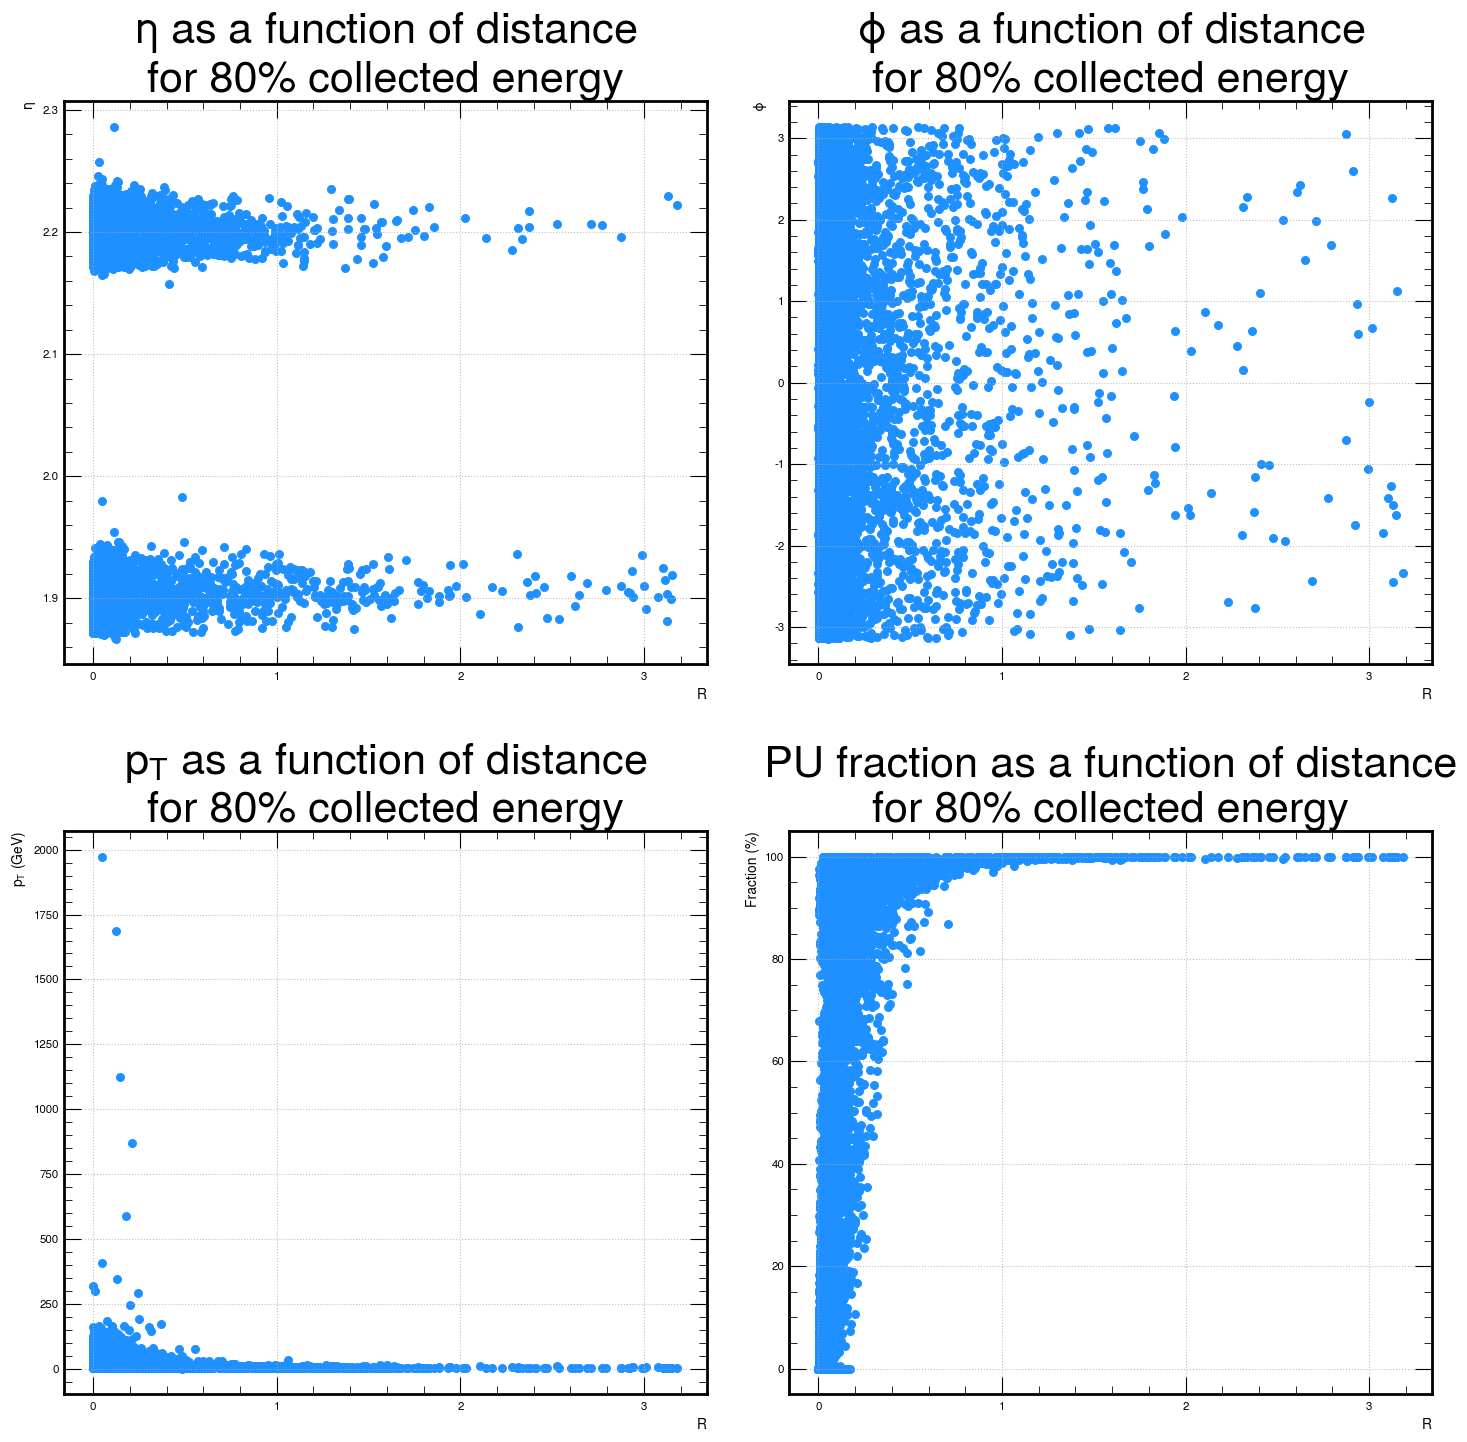

In [7]:

with open('results.pkl', 'rb') as file:
    dict_info=pickle.load(file)

print(len(dict_info["R"]),len(dict_info["pt_trk"]),len(dict_info["phi_trk"]),len(dict_info["eta_trk"]),len(dict_info["contamination"]))

def scatterAx(plt, X, Y, s=10, title='title', xlabel='time (ns)', ylabel='z (cm)'):
    try:
        plt.scatter(ak.flatten(X), ak.flatten(Y), s=ak.flatten(s), color='dodgerblue')
    except:
        plt.scatter(X, Y, s=s, color='dodgerblue')
    plt.set_title(title)
    plt.set_xlabel(xlabel)
    plt.set_ylabel(ylabel)
    plt.grid()

fig, axs = plt.subplots(2, 2, figsize=(15,15), dpi=100)
plt.style.use(hep.style.CMS)

# Flatten the 2x2 grid into a list to easily access each subplot
axs = axs.flatten()

# Plot each scatter plot on its corresponding axis
scatterAx(axs[0], dict_info["R"], (dict_info["eta_trk"]), s=30, title=f'$\eta$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel=f'$\eta$')
scatterAx(axs[1], dict_info["R"], dict_info["phi_trk"],      s=30, title=f'$\phi$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel=f'$\phi$')
scatterAx(axs[2], dict_info["R"], dict_info["pt_trk"],      s=30, title=f'$p_T$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel='$p_T$ (GeV)')
scatterAx(axs[3], dict_info["R"], dict_info["contamination"],      s=30, title=f'PU fraction as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel='Fraction (%)')

plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
plt.show()

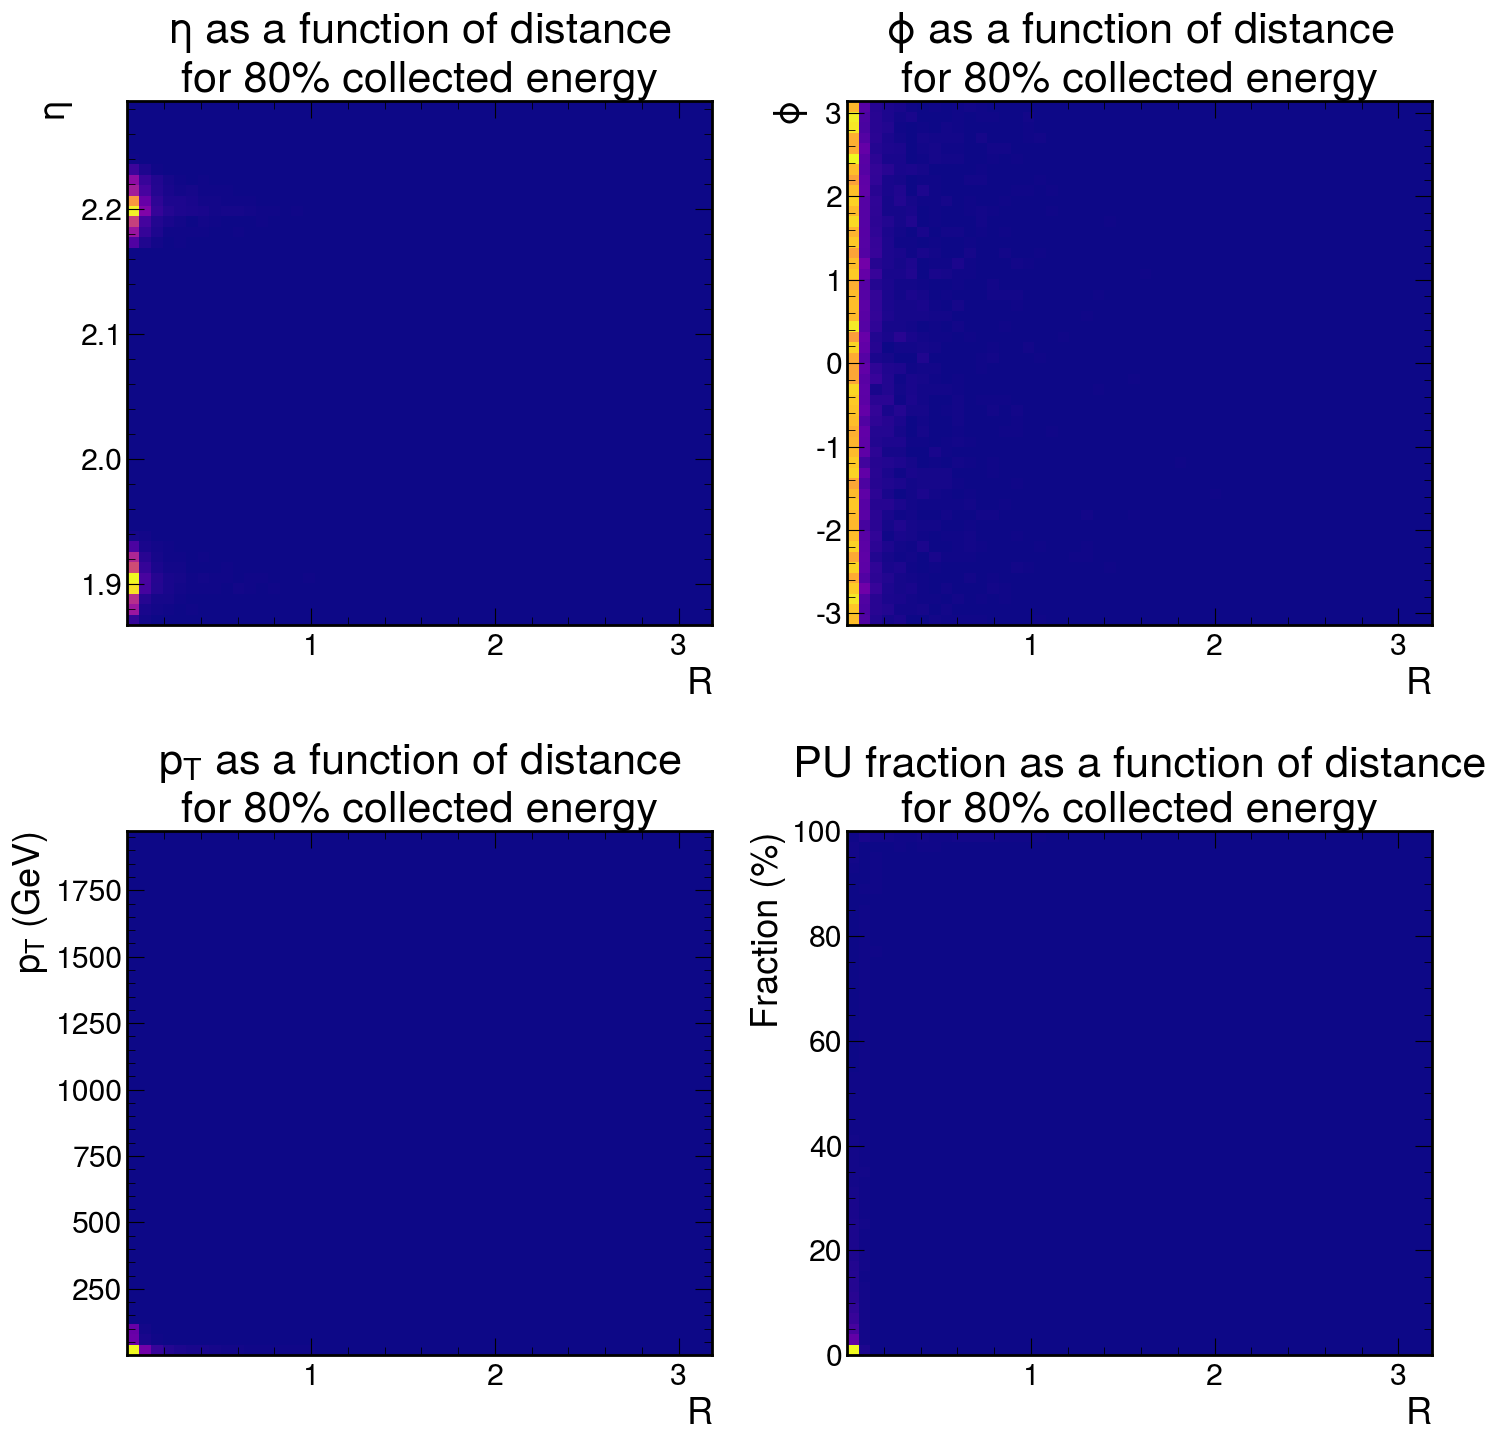

In [8]:
def hist2D_Ax(plt, X, Y, s=10, title='title', xlabel='time (ns)', ylabel='z (cm)'):
    try:
        plt.hist2d(ak.flatten(X), ak.flatten(Y),bins=10)#, s=ak.flatten(s), color='dodgerblue')
    except:
        plt.hist2d(X, Y,bins=50,cmap="plasma")#, s=s, color='dodgerblue')
    #plt.colorbar()
    plt.set_title(title)
    plt.set_xlabel(xlabel)
    plt.set_ylabel(ylabel)
    #plt.grid()

fig, axs = plt.subplots(2, 2, figsize=(15,15), dpi=100)
plt.style.use(hep.style.CMS)

# Flatten the 2x2 grid into a list to easily access each subplot
axs = axs.flatten()

# Plot each scatter plot on its corresponding axis
hist2D_Ax(axs[0], dict_info["R"], (dict_info["eta_trk"]), s=30, title=f'$\eta$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel=f'$\eta$')
hist2D_Ax(axs[1], dict_info["R"], dict_info["phi_trk"],      s=30, title=f'$\phi$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel=f'$\phi$')
hist2D_Ax(axs[2], dict_info["R"], dict_info["pt_trk"],      s=30, title=f'$p_T$ as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel='$p_T$ (GeV)')
hist2D_Ax(axs[3], dict_info["R"], dict_info["contamination"],      s=30, title=f'PU fraction as a function of distance\nfor {CUT*100:.0f}% collected energy', xlabel="R", ylabel='Fraction (%)')

plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
plt.show()

# BDT

In [9]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [10]:
#array_ts_info = np.array(ts_info).T

data_dict = dict_info
#print(data_dict)
df = pd.DataFrame(data_dict)
df_features = df[['eta_trk','phi_trk','pt_trk']]
df_label = df[['R', 'contamination']]
df_weights=df[["simEnergy"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_features, df_label, test_size=0.1, random_state=42)

# Convert to DMatrix format for XGBoost
train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Train the model
xg_reg = xgb.train(params, train_dmatrix, num_boost_round=100)

# Predict on test data
y_pred = xg_reg.predict(test_dmatrix)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 393.13305729662255


In [11]:
X_test, y_test

(       eta_trk   phi_trk      pt_trk
 8251  2.185930 -2.624997  100.269073
 1713  1.875692 -0.306345   15.018851
 735   1.888886  1.939829  103.546318
 2254  1.898904 -0.894782   15.077683
 3646  1.889838 -0.804499   27.759733
 ...        ...       ...         ...
 8723  2.203591 -0.530638   10.026022
 8486  2.207524  2.638061  101.285355
 8576  2.185156 -1.003964  110.862183
 2344  1.921933 -2.745446    1.983631
 1632  1.910140 -2.216242    9.997593
 
 [1588 rows x 3 columns],
              R  contamination
 8251  0.051605       1.306555
 1713  0.006110       0.000000
 735   0.011123       2.079477
 2254  0.011461       0.000000
 3646  0.008027       1.113337
 ...        ...            ...
 8723  0.090965      39.938888
 8486  0.057416       1.007895
 8576  0.004705       1.130629
 2344  0.204091      94.464559
 1632  0.003783       0.000000
 
 [1588 rows x 2 columns])

In [12]:
y_test, y_pred

(             R  contamination
 8251  0.051605       1.306555
 1713  0.006110       0.000000
 735   0.011123       2.079477
 2254  0.011461       0.000000
 3646  0.008027       1.113337
 ...        ...            ...
 8723  0.090965      39.938888
 8486  0.057416       1.007895
 8576  0.004705       1.130629
 2344  0.204091      94.464559
 1632  0.003783       0.000000
 
 [1588 rows x 2 columns],
 array([[ 5.5962872e-02,  1.3349414e+00],
        [ 5.4823939e-02,  9.1125774e+00],
        [-5.5977865e-03, -2.0212646e-01],
        ...,
        [ 2.1037044e-02,  8.1356039e+00],
        [ 1.4484324e-01,  4.6383381e+01],
        [ 5.1860154e-02,  1.8093809e+01]], dtype=float32))

In [13]:
# Assume you have a DataFrame called new_data with the same structure as your training data
new_data = pd.DataFrame({
    'eta_trk': [1.7, 2.3],
    'phi_trk': [0.3, 0.4],
    'pt_trk': [150, 55]    # Example PU contamination values
})

# Convert to DMatrix format for XGBoost
new_dmatrix = xgb.DMatrix(new_data)

# Use the trained model to predict r values for new data
y_new_pred = xg_reg.predict(new_dmatrix)

# Display the predictions
print(f"Predicted r values for new data: {y_new_pred}")

Predicted r values for new data: [[ 0.11884429  2.0630672 ]
 [ 0.04035405 17.009132  ]]


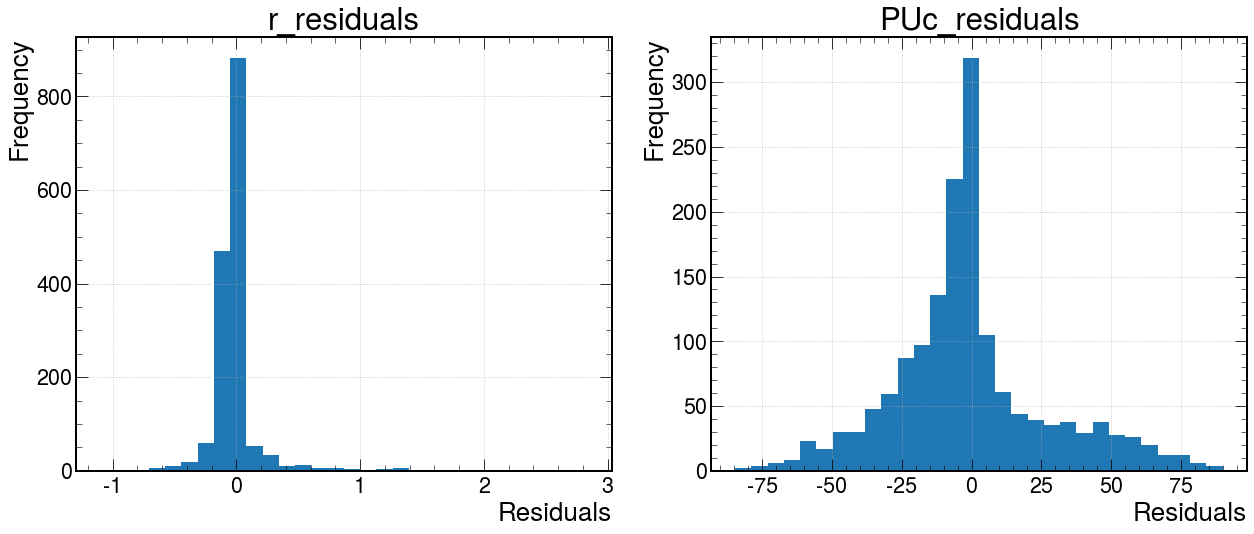

In [14]:
# Assuming y_test is a DataFrame or a numpy array with two columns (r and PUc)
# y_pred is the predicted output from the model

# Convert y_test to a numpy array (if it's a DataFrame)
y_test_array = np.array(y_test)

# Compute residuals
residuals = y_test_array - y_pred

# Convert residuals to a DataFrame for easy handling
residuals_df = pd.DataFrame(residuals, columns=['r_residuals', 'PUc_residuals'])

# Calculate mean and standard deviation for both r_residuals and PUc_residuals
r_mean = residuals_df['r_residuals'].mean()
r_std = residuals_df['r_residuals'].std()

PUc_mean = residuals_df['PUc_residuals'].mean()
PUc_std = residuals_df['PUc_residuals'].std()

# Plot the residuals
fig, axs = plt.subplots(1, 2, figsize=(18,8))
residuals_df['r_residuals'].hist(bins=30, ax=axs[0])
axs[0].set_title(f'r_residuals')
#axs[0].text(0.1, 100, f'Mean: {r_mean:.5f}\nStd: {r_std:.5f}')
axs[0].set_xlabel('Residuals')
axs[0].set_ylabel('Frequency')

residuals_df['PUc_residuals'].hist(bins=30, ax=axs[1])
axs[1].set_title(f'PUc_residuals')
#axs[1].text(0.05, 100, f'Mean: {PUc_mean:.5f}\nStd: {PUc_std:.5f}')
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [15]:
num_trees = xg_reg.num_boosted_rounds()
print(f"Number of trees in the model: {num_trees}")

Number of trees in the model: 100


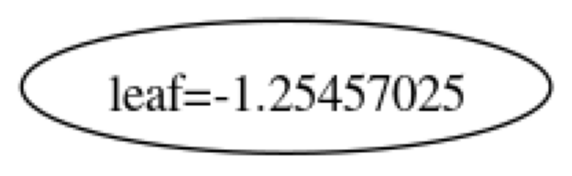

In [16]:
# Plot a specific tree (e.g., tree 0)
xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]  # Adjust the plot size to make it readable
plt.show()

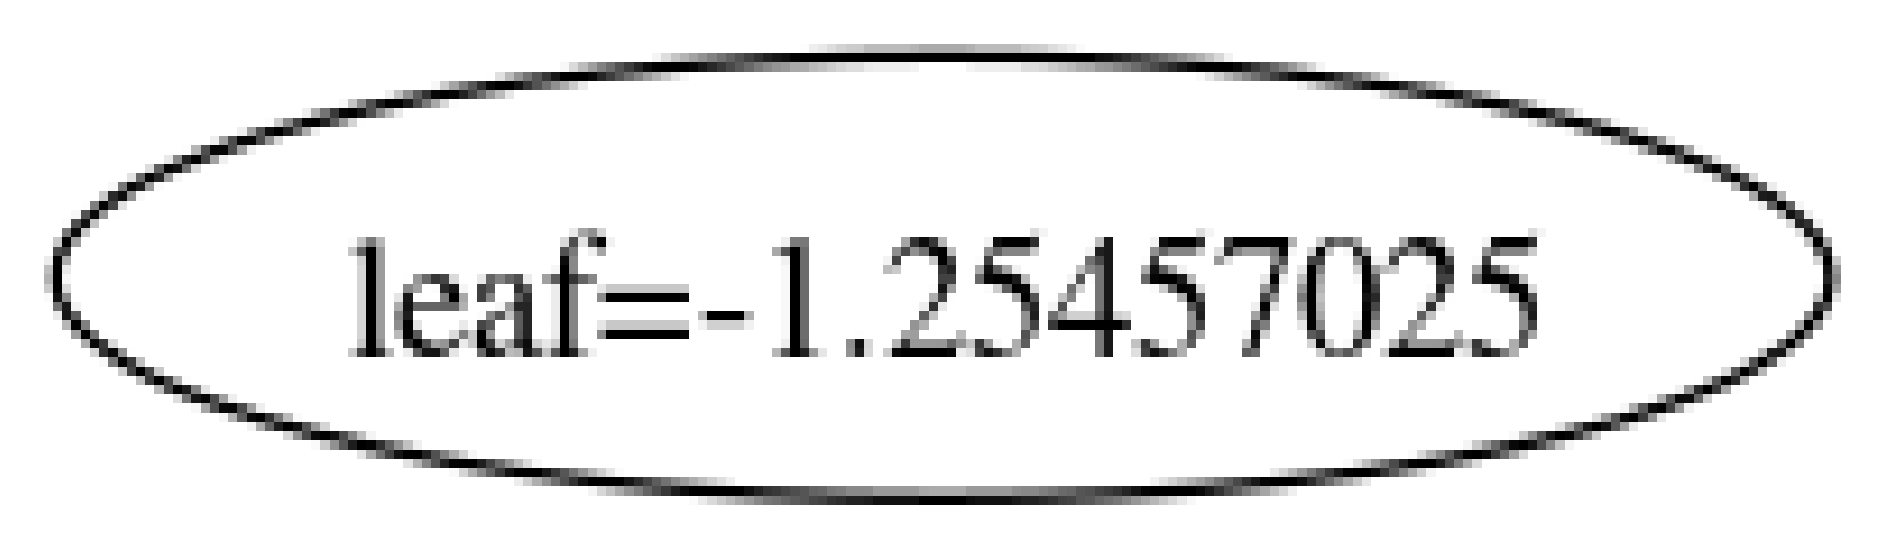

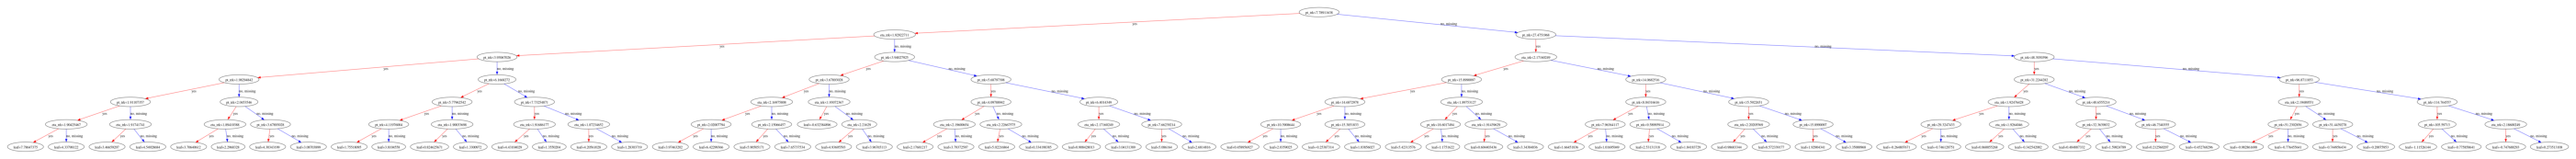

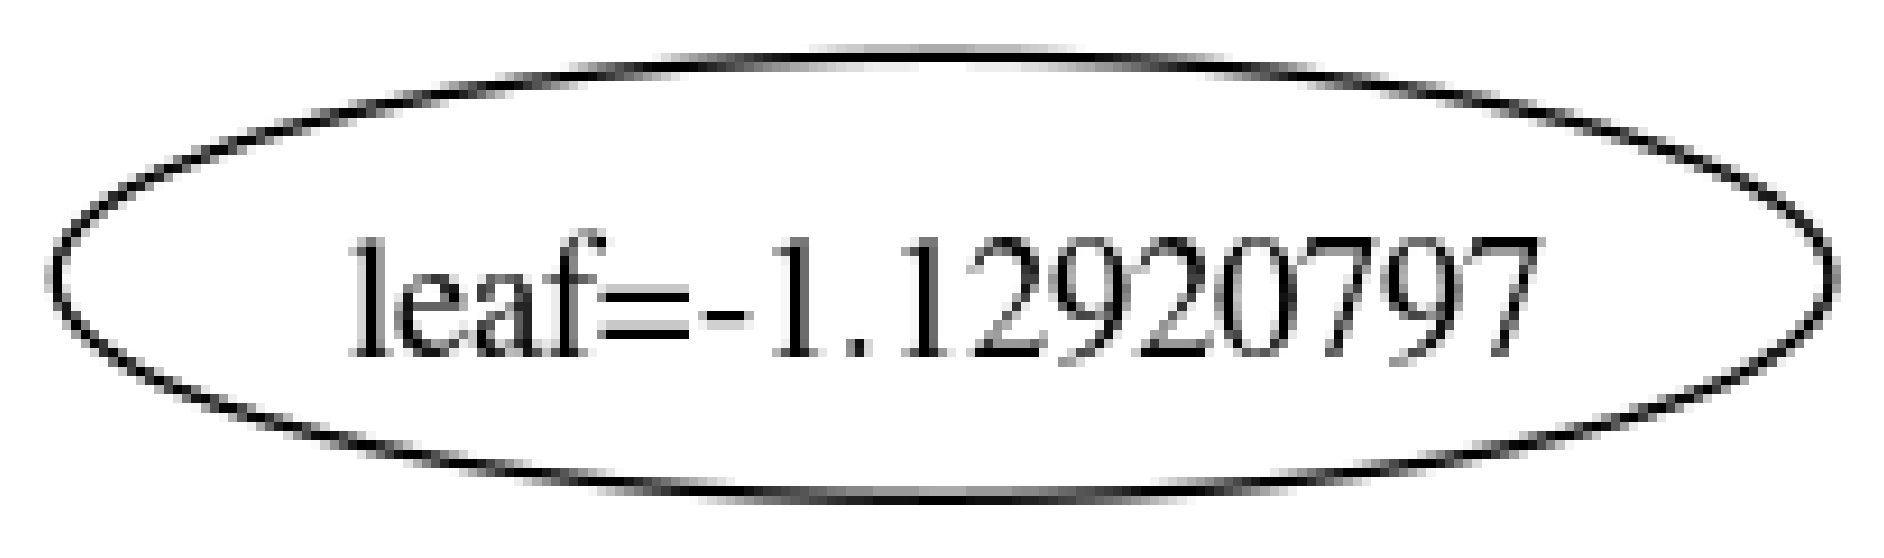

In [17]:
for i in range(3):
    xgb.plot_tree(xg_reg, num_trees=i)
    plt.show()

In [18]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb_reg = XGBRegressor(objective='reg:squarederror')

# Define the parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7, 9],
    #'learning_rate': [0.01, 0.05, 0.1],
    'eta': [0.02, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2],
    'alpha': [0, 0.1, 0.5]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Minimize MSE
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validated MSE: {-grid_search.best_score_}")

# Train the final model with the best parameters
best_xgb = grid_search.best_estimator_

# Predict on the test data
y_pred = best_xgb.predict(X_test)

# Calculate MSE on the test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test data: {mse}")


Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
Best parameters found: {'alpha': 0, 'colsample_bytree': 0.8, 'eta': 0.1, 'gamma': 0.1, 'lambda': 2, 'max_depth': 3, 'subsample': 1.0}
Best cross-validated MSE: 401.97910087179076
Mean Squared Error on test data: 380.1612283547967


In [20]:
# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',
}

params.update(grid_search.best_params_)
print(params)

# Train the model
xg_reg = xgb.train(params, train_dmatrix, num_boost_round=100)

# Predict on test data
y_pred = xg_reg.predict(test_dmatrix)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
"""
# Assume you have a DataFrame called new_data with the same structure as your training data
new_data = pd.DataFrame({
    'z': [360,300],         # Example values for new data
    'eta': [1.7, 2.3],
    'phi': [0.3, 0.4],
    'energy': [150, 55]    # Example PU contamination values
})

# Convert to DMatrix format for XGBoost
new_dmatrix = xgb.DMatrix(new_data)

# Use the trained model to predict r values for new data
y_new_pred = xg_reg.predict(new_dmatrix)

# Display the predictions
print(f"Predicted r values for new data: {y_new_pred}")
"""
# Get the number of trees in the model
num_trees = xg_reg.num_boosted_rounds()
print(f"Number of trees in the model: {num_trees}")

{'objective': 'reg:squarederror', 'alpha': 0, 'colsample_bytree': 0.8, 'eta': 0.1, 'gamma': 0.1, 'lambda': 2, 'max_depth': 3, 'subsample': 1.0}
Mean Squared Error: 380.1612283547967
Number of trees in the model: 100


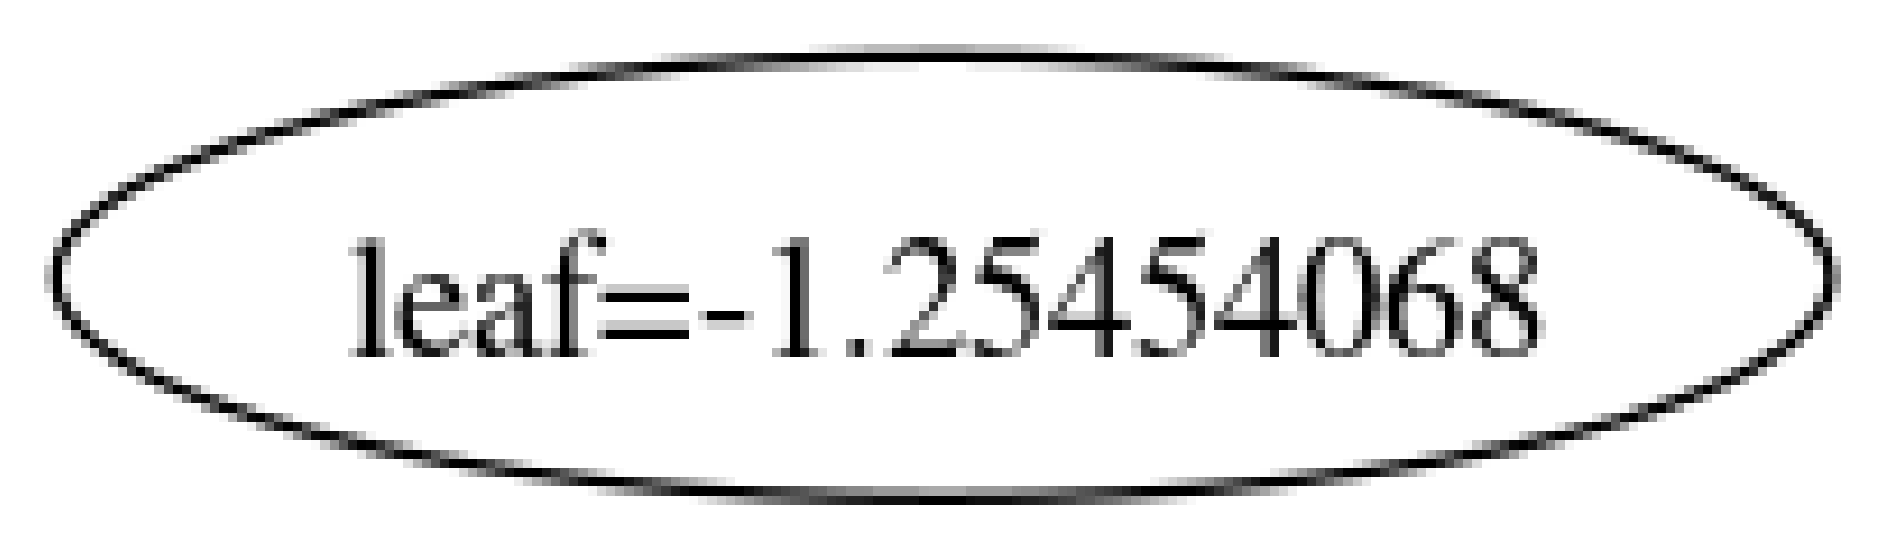

In [21]:
# Plot a specific tree (e.g., tree 0)
xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]  # Adjust the plot size to make it readable
plt.show()

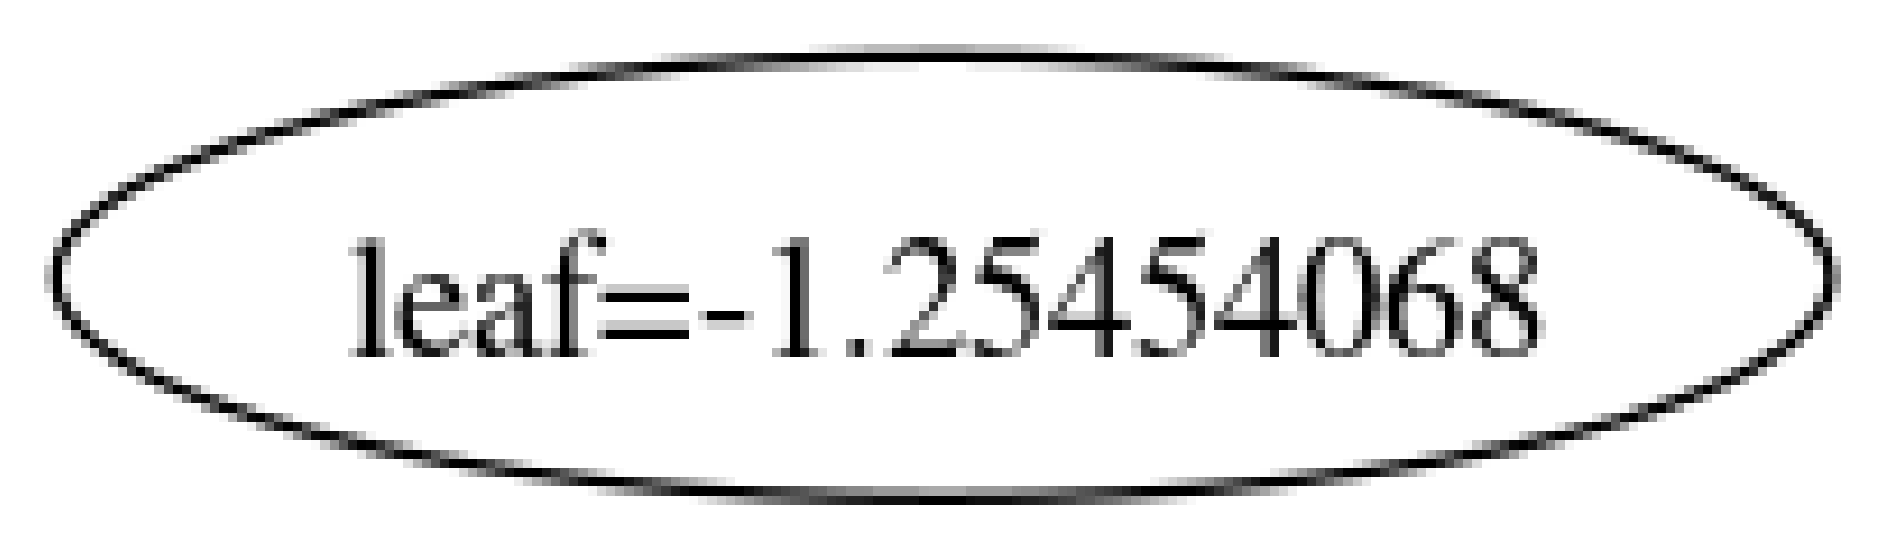

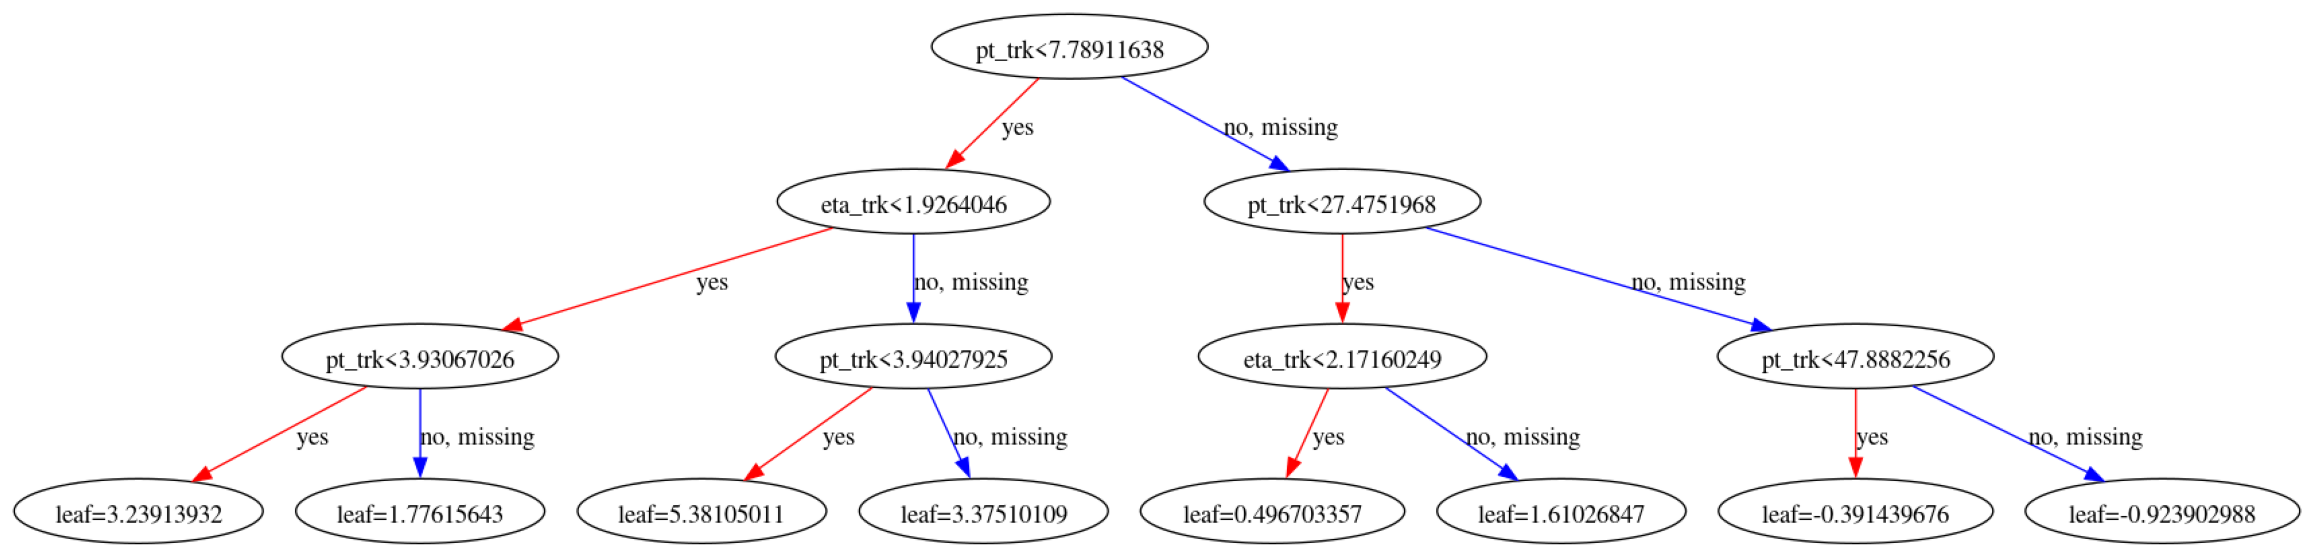

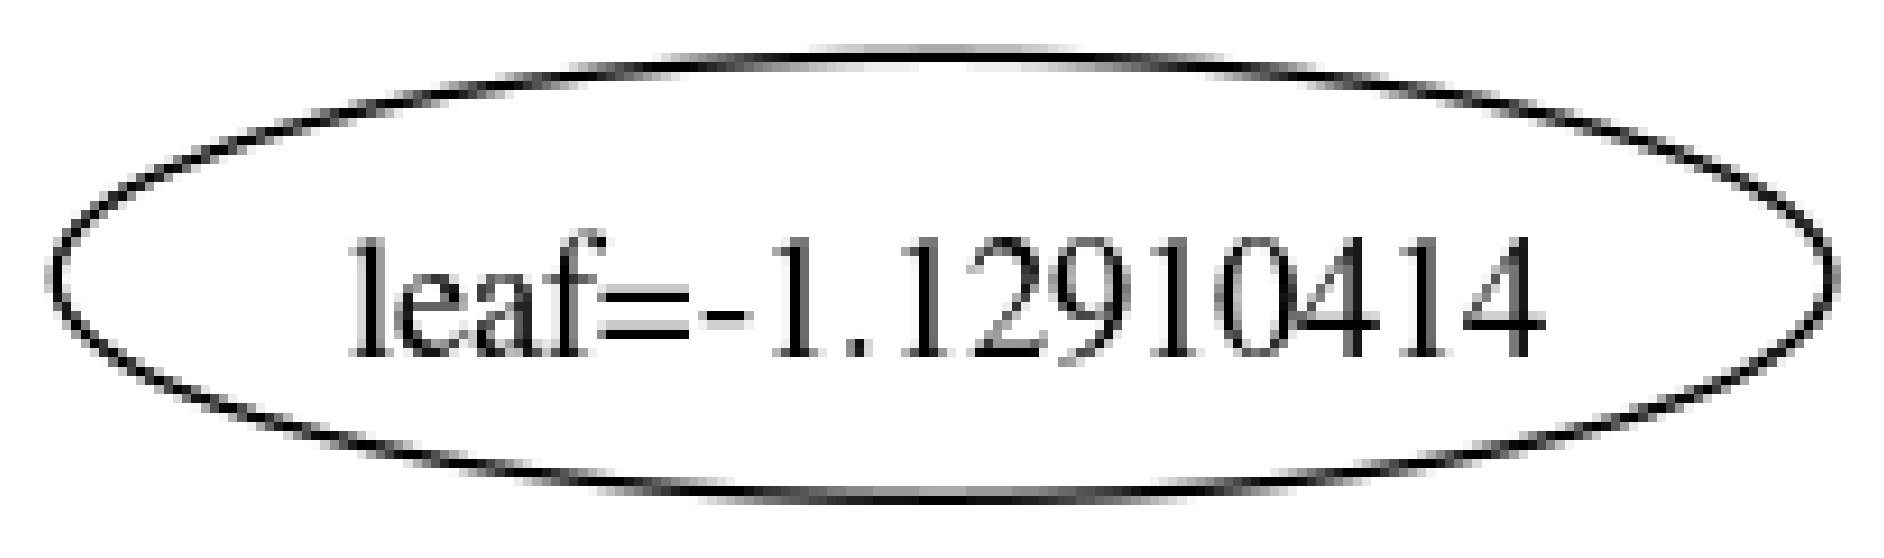

In [22]:
for i in range(3):
    xgb.plot_tree(xg_reg, num_trees=i)
    plt.show()

In [23]:
# # save to JSON
xg_reg.save_model("model230files.json")

# model_xgb_2 = xgb.Booster()
# model_xgb_2.load_model("model.json")

Feature Importance (by frequency): {'eta_trk': 286.0, 'phi_trk': 201.0, 'pt_trk': 524.0}


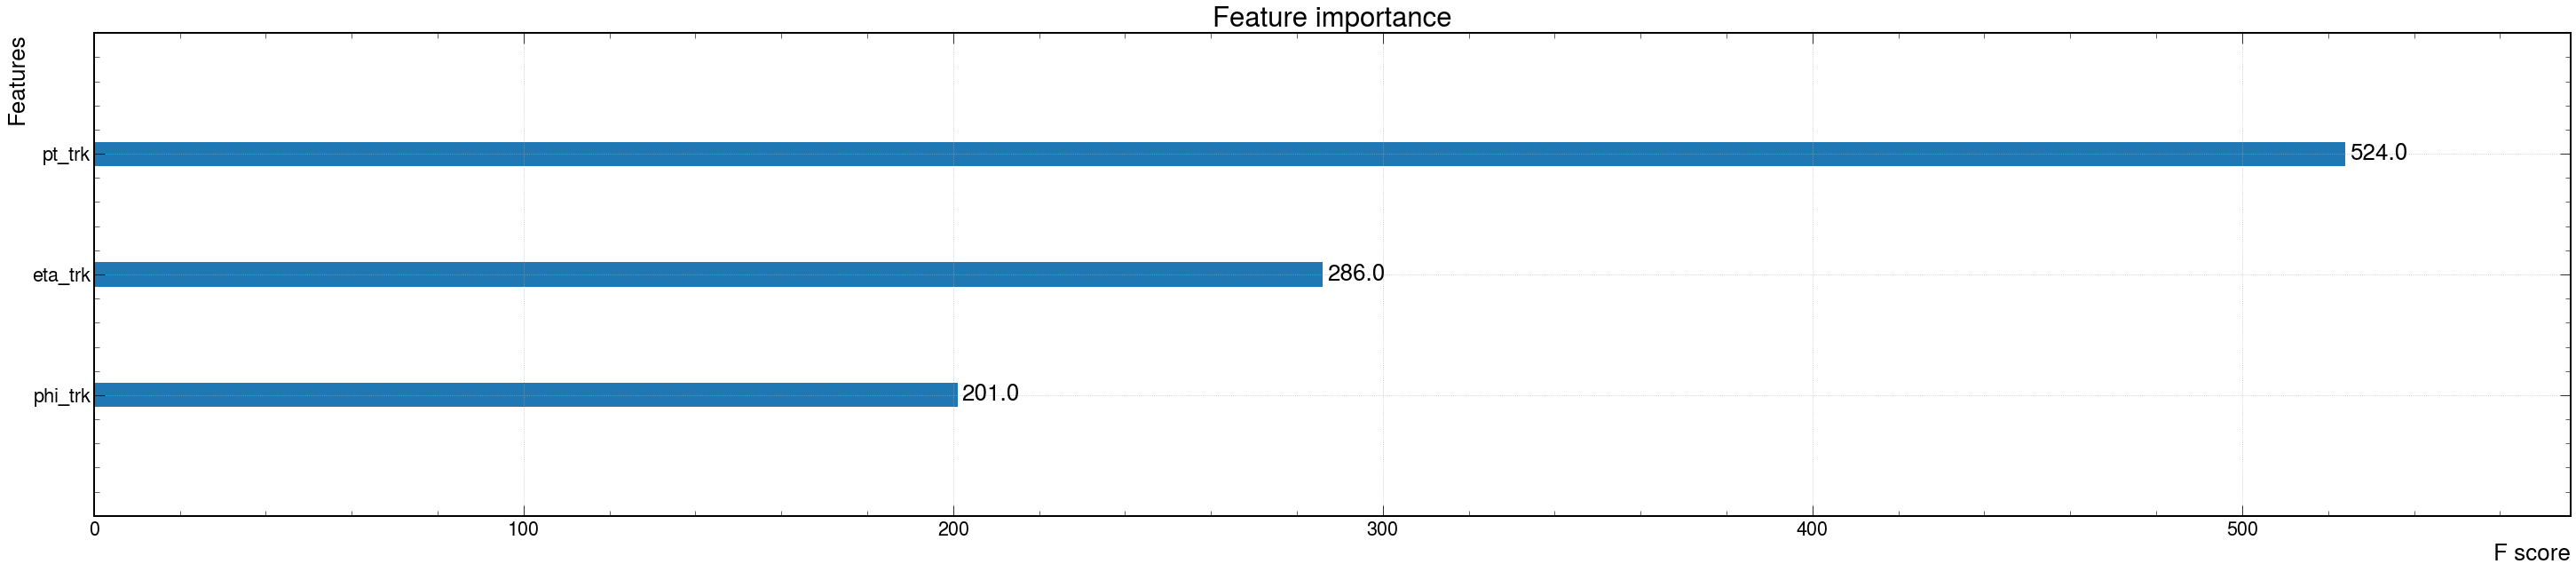

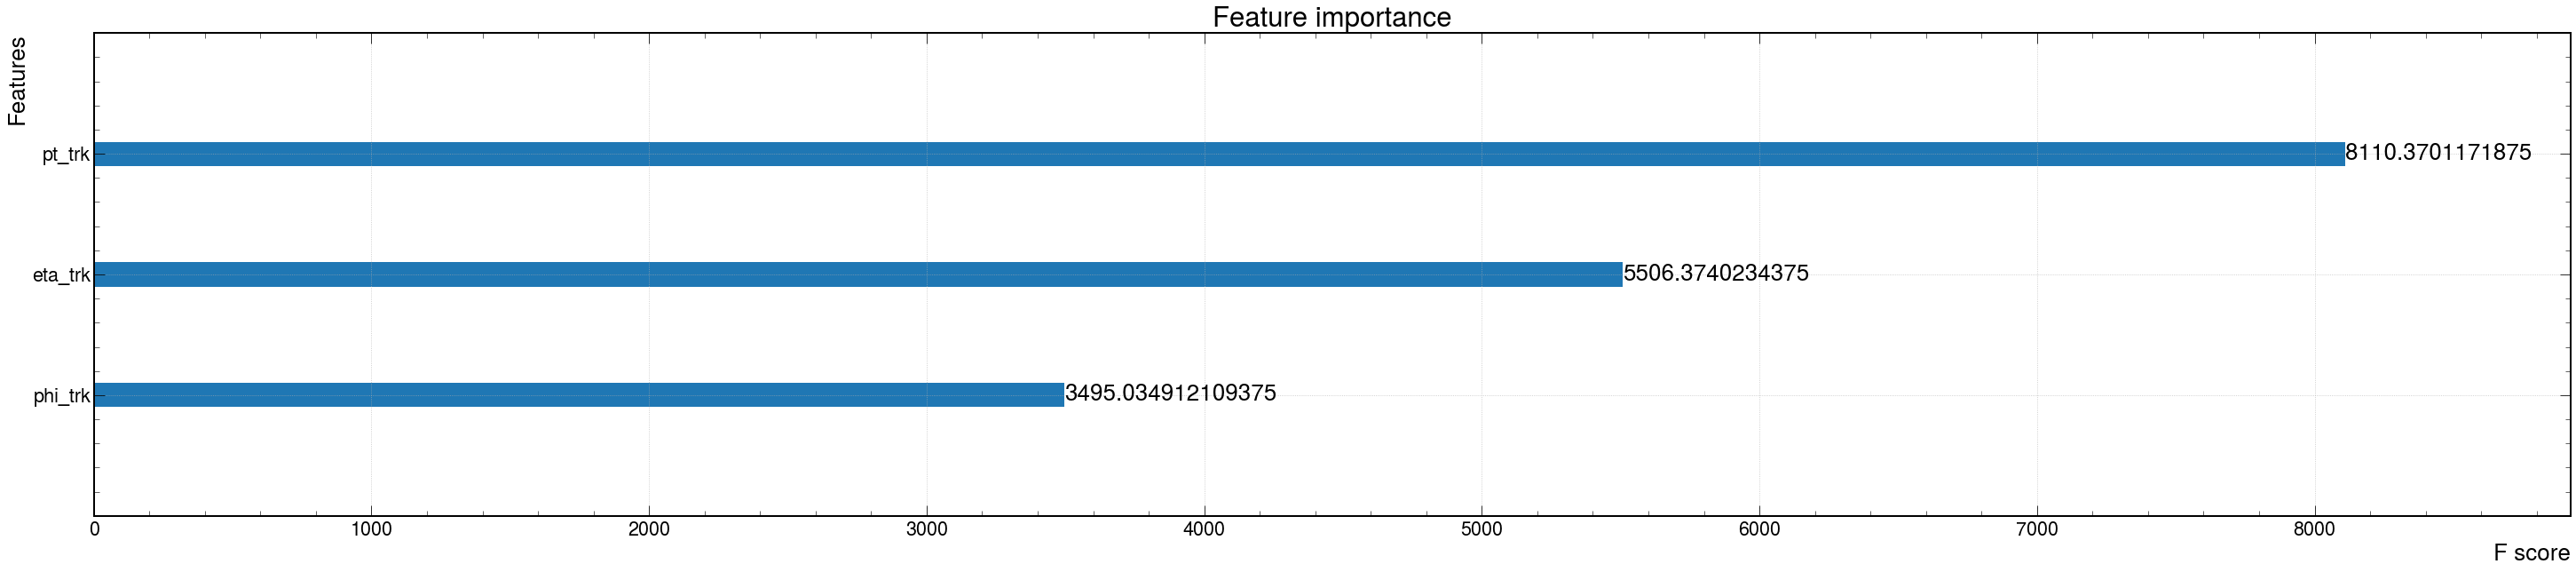

   Feature    Importance
2   pt_trk  50719.644531
0  eta_trk  14175.169922
1  phi_trk   2544.767090


In [25]:
# Get feature importance as a dictionary
feature_importance = xg_reg.get_score(importance_type='weight')
print("Feature Importance (by frequency):", feature_importance)


import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance (default: based on weight, i.e., frequency)
xgb.plot_importance(xg_reg, importance_type='weight')
plt.show()

# # You can also plot feature importance based on 'gain' or 'cover':
# # Gain: the improvement in accuracy brought by a feature to the branches it is on
# ax = xgb.plot_importance(xg_reg, importance_type='gain')
# plt.show()

# Cover: the relative number of observations affected by a feature
xgb.plot_importance(xg_reg, importance_type='cover')
plt.show()

import pandas as pd

# Get feature importance by gain
importance_dict = xg_reg.get_score(importance_type='gain')

# Convert to a pandas DataFrame for better visualization and analysis
importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Importance'])

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(importance_df)


In [26]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.9/539.9 kB 14.8 MB/s eta 0:00:0000:01
DEPRECATION: gosam 2.1.1-4b98559 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gosam or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: professor2 X.Y.Z has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of professor2 or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [27]:
import sys
sys.path.append('/eos/home-t/tipaulet/.local/lib/python3.9/site-packages')
import shap

print(X_test.corr())

          eta_trk   phi_trk    pt_trk
eta_trk  1.000000  0.020653 -0.012560
phi_trk  0.020653  1.000000  0.004369
pt_trk  -0.012560  0.004369  1.000000


In [28]:
# Create an explainer using your trained model
explainer = shap.TreeExplainer(xg_reg)

# Compute SHAP values for your test data
shap_values = explainer.shap_values(X_test)

In [29]:
# Assuming two outputs, you can extract SHAP values for each
shap_values_r = shap_values[:, :, 0]  # SHAP values for the first output 'r'
shap_values_puc = shap_values[:, :, 1]  # SHAP values for the second output 'PUc'

# Convert SHAP values for 'r' to a DataFrame
shap_values_r_df = pd.DataFrame(shap_values_r, columns=X_test.columns)
print(shap_values_r_df.describe())

# Convert SHAP values for 'PUc' to a DataFrame (optional, if you want to analyze PUc separately)
shap_values_puc_df = pd.DataFrame(shap_values_puc, columns=X_test.columns)
print(shap_values_puc_df.describe())

           eta_trk      phi_trk       pt_trk
count  1588.000000  1588.000000  1588.000000
mean      0.000365    -0.000036     0.000113
std       0.006696     0.004854     0.073794
min      -0.040010    -0.055984    -0.073454
25%      -0.002909    -0.000418    -0.055091
50%       0.001786     0.000368    -0.016148
75%       0.002931     0.001308     0.028569
max       0.119739     0.087093     0.463002
           eta_trk      phi_trk       pt_trk
count  1588.000000  1588.000000  1588.000000
mean     -0.001844    -0.012916    -0.249562
std       5.346889     0.807274    18.083586
min     -15.275571    -6.290422   -24.890699
25%      -4.932140    -0.520192   -17.656102
50%       1.625138    -0.039740    -2.277134
75%       4.618187     0.592651    12.666622
max      11.055801     4.385519    50.132755


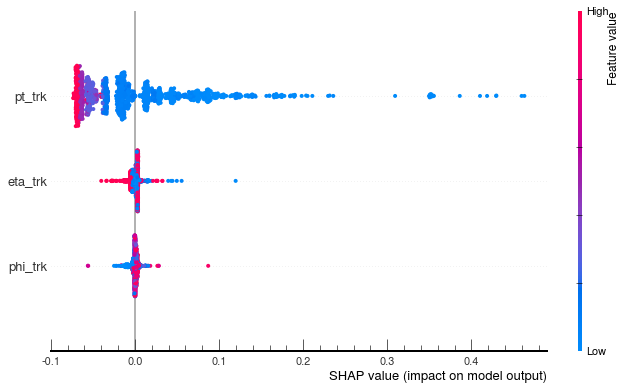

In [30]:
# Plot SHAP summary for 'r'
shap.summary_plot(shap_values_r, X_test, plot_size=(10,6)) # , max_display=X_test.shape[1] is for the max number of variables to be displayed (default is 20)

In [ ]:
# Plot SHAP summary for 'r'
shap.summary_plot(shap_values_r, X_test, plot_size=(10,6)) # , max_display=X_test.shape[1] is for the max number of variables to be displayed (default is 20)